<a href="https://colab.research.google.com/github/reutDayan1/reutDayan1/blob/main/reut_dayan_ex3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GITHUB:https://github.com/reutDayan1/reutDayan1

Exercise 3: Clustering

1. Function to create synthetic data - please do not change

In [55]:
import numpy as np
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt


def create_data(the_noise, n1_samples, n2_samples, n3_samples, n4_samples):
  # 1
  X_1, y_1 = make_blobs(
    n_samples=n1_samples,
    centers=4,
    random_state=42)

  # 2
  X_2, y_2 = make_moons(
      n_samples=n2_samples,
      noise=the_noise,
      random_state=42
  )

  X_2[:, 0] += 10
  X_2[:, 1] += 10

  # 3
  rng = np.random.RandomState(42)
  angles = rng.rand(n3_samples) * 2 * np.pi
  r = 5.0 + rng.randn(n3_samples) * the_noise
  X_3 = np.column_stack((r * np.cos(angles), r * np.sin(angles)))
  X_3[:, 0] += 20


  # combine
  X = np.vstack((X_1, X_2, X_3))


  return X

2. Call create_data and visualize the data

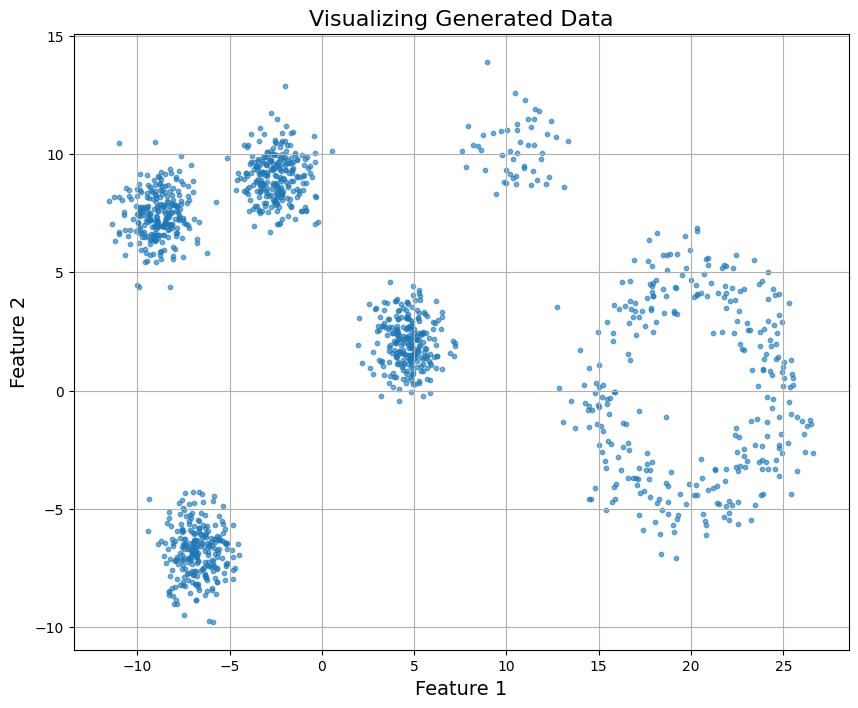

In [56]:

X = create_data(1.0, 1000, 50, 300, 200)

# Data visuazliation is here:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.6)
plt.title("Visualizing Generated Data", fontsize=16)
plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)
plt.grid(True)
plt.show()


3. Train KMeans
- use library sklearn.cluster.KMeans
- training data: X
- explore and optimize KMeans options
- choose the number of clusters using the Silhouette Method    

In [57]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
k_values = [2, 4, 8, 12, 14, 5, 9]
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10,max_iter=100,tol=0.00005).fit(X)
Klabels = kmeans.labels_
Ksilhouette= silhouette_score(X,Klabels)
centers = kmeans.cluster_centers_
print(f"silhouette score: {Ksilhouette}")


silhouette score: 0.7251181630059241


4. Train Agglomerative Clustering

- use library sklearn.cluster.AgglomerativeClustering
- training data: X
- explore and optimize AgglomerativeClustering options
- choose the number of clusters using any method you want  

In [58]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
clustering = AgglomerativeClustering(n_clusters=10,linkage="complete").fit(X)
clustering
AgglomerativeClustering()
Agglabel = clustering.labels_
Aggsilhouette_ = silhouette_score(X, Agglabel)
print(f"silhouette score: {Aggsilhouette_}")



silhouette score: 0.7078385268925678


5. Train DBSCAN
- use library sklearn.cluster.DBSCAN
- training data: X
- explore and optimize DBSCAN options


In [59]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=1,min_samples=5,algorithm="brute").fit(X)
label_d = clustering.labels_
clustering
DBSCAN()
n_clusters = len(set(label_d)) - (1 if -1 in label_d else 0)
Dbsilhouette = silhouette_score(X, label_d)
print(f"Silhouette Score: {Dbsilhouette}")
print(f"Number of Clusters: {n_clusters}")


Silhouette Score: 0.7070123298589694
Number of Clusters: 6


6. Compare the results and choose the best method for the data


In [60]:
best_method = "KMeans"
best_silhouette = Ksilhouette

if Aggsilhouette_ > best_silhouette:
    best_method = "Agglomerative Clustering"
    best_silhouette = Aggsilhouette_

if Dbsilhouette is not None and Dbsilhouette > best_silhouette:
    best_method = "DBSCAN"
    best_silhouette = Dbsilhouette
print(f"\nBest Method: {best_method}")


Best Method: KMeans
